# Theoretical 


### **1. What is a Decision Tree, and how does it work?**

**Ans:** A Decision Tree is a supervised learning algorithm used for classification and regression. It splits data into branches based on feature values, forming a tree-like structure. Each node represents a feature, branches represent decision rules, and leaves represent outcomes.

---

### **2. What are impurity measures in Decision Trees?**

**Ans:** Impurity measures evaluate how mixed the classes are in a node. Common measures include **Gini Impurity** and **Entropy**. Lower impurity means purer nodes and better splits.

---

### **3. What is the mathematical formula for Gini Impurity?**

**Ans:**

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$

where $p_i$ is the probability of class $i$ in a node.

---

### **4. What is the mathematical formula for Entropy?**

**Ans:**

$$
Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$

where $p_i$ is the probability of class $i$.

---

### **5. What is Information Gain, and how is it used in Decision Trees?**

**Ans:** Information Gain measures the reduction in entropy after a dataset is split on a feature. It helps the tree choose the best feature for splitting.

---

### **6. What is the difference between Gini Impurity and Entropy?**

**Ans:** Both measure node impurity, but Gini is faster to compute. Entropy is based on information theory and penalizes impure nodes more heavily. Both often yield similar results.

---

### **7. What is the mathematical explanation behind Decision Trees?**

**Ans:** A Decision Tree recursively splits the dataset using a criterion (e.g., Gini or Entropy) to maximize Information Gain. This process continues until stopping criteria are met.

---

### **8. What is Pre-Pruning in Decision Trees?**

**Ans:** Pre-pruning stops tree growth early based on conditions like maximum depth or minimum samples per leaf to prevent overfitting.

---

### **9. What is Post-Pruning in Decision Trees?**

**Ans:** Post-pruning builds a full tree and then prunes back nodes that do not provide significant accuracy improvement, reducing overfitting.

---

### **10. What is the difference between Pre-Pruning and Post-Pruning?**

**Ans:** Pre-pruning stops tree growth early; post-pruning trims the tree after full growth. Pre-pruning is preventive; post-pruning is corrective.

---

### **11. What is a Decision Tree Regressor?**

**Ans:** It is a Decision Tree used for regression tasks. Instead of predicting classes, it predicts continuous values by averaging the target in each leaf.

---

### **12. What are the advantages and disadvantages of Decision Trees?**

**Ans:**
**Advantages:** Easy to interpret, handles both numerical and categorical data, requires little data preprocessing.
**Disadvantages:** Prone to overfitting, unstable with small data changes, biased to dominant features.

---

### **13. How does a Decision Tree handle missing values?**

**Ans:** Some implementations handle missing values by assigning the sample to the most frequent or weighted average of possible branches.

---

### **14. How does a Decision Tree handle categorical features?**

**Ans:** It splits based on unique category values or binary conditions (e.g., "feature = category"). Some libraries convert categories into numbers internally.

---

### **15. What are some real-world applications of Decision Trees?**

**Ans:** Used in credit scoring, medical diagnosis, loan approval, customer segmentation, and predicting stock prices or sales.


# Pratical 

In [2]:
# 1. Train Decision Tree Classifier on Iris Dataset & Print Accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [3]:
# 2. Train Using Gini Impurity and Print Feature Importances

model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)

print("Feature Importances (Gini):", model_gini.feature_importances_)

Feature Importances (Gini): [0.01911002 0.         0.89326355 0.08762643]


In [4]:
# 3. Train Using Entropy and Print Accuracy

model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))

Accuracy (Entropy): 1.0


In [5]:
# 4. Train Decision Tree Regressor on Housing Dataset (Use Local CSV Instead of Download)

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# You need to load local housing dataset or replace this with a small dummy dataset
# Example dataset with 2 features and 1 target
data = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 4, 6, 8, 10],
    'Target': [100, 150, 200, 250, 300]
})

X = data[['Feature1', 'Feature2']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 2500.0


In [6]:
# 6. Max Depth 3 vs Full Tree

shallow_model = DecisionTreeClassifier(max_depth=3)
shallow_model.fit(X_train, y_train)
shallow_pred = shallow_model.predict(X_test)

print("Shallow Tree Accuracy (depth=3):", accuracy_score(y_test, shallow_pred))
print("Full Tree Accuracy:", accuracy_score(y_test, y_pred))  # From previous model

Shallow Tree Accuracy (depth=3): 0.0
Full Tree Accuracy: 0.0


In [7]:
# 7. min_samples_split=5 vs Default

min_split_model = DecisionTreeClassifier(min_samples_split=5)
min_split_model.fit(X_train, y_train)
min_split_pred = min_split_model.predict(X_test)

default_model = DecisionTreeClassifier()
default_model.fit(X_train, y_train)
default_pred = default_model.predict(X_test)

print("Accuracy (min_samples_split=5):", accuracy_score(y_test, min_split_pred))
print("Accuracy (default):", accuracy_score(y_test, default_pred))

Accuracy (min_samples_split=5): 0.0
Accuracy (default): 0.0


In [8]:
# 8. Feature Scaling Before Training Decision Tree

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Unscaled train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree on unscaled data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
unscaled_pred = model.predict(X_test)
print("Accuracy without scaling:", accuracy_score(y_test, unscaled_pred))

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scaled train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Decision Tree on scaled data
model_scaled = DecisionTreeClassifier()
model_scaled.fit(X_train_s, y_train_s)
scaled_pred = model_scaled.predict(X_test_s)
print("Accuracy with scaling:", accuracy_score(y_test_s, scaled_pred))


Accuracy without scaling: 1.0
Accuracy with scaling: 1.0


In [9]:
# 9. Train a Decision Tree Classifier using One-vs-Rest (OvR) for Multiclass Classification

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X_train, y_train)
y_pred = ovr_model.predict(X_test)

print("OvR Accuracy:", accuracy_score(y_test, y_pred))

OvR Accuracy: 1.0


In [10]:
# 10. Train a Decision Tree Classifier and Display Feature Importances

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

for name, importance in zip(iris.feature_names, importances):
    print(f"{name}: {importance:.4f}")

sepal length (cm): 0.0191
sepal width (cm): 0.0191
petal length (cm): 0.8742
petal width (cm): 0.0876


In [11]:
# 11. Decision Tree Regressor with max_depth=5 vs. Unrestricted

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_limited = DecisionTreeRegressor(max_depth=5)
reg_full = DecisionTreeRegressor()

reg_limited.fit(X_train, y_train)
reg_full.fit(X_train, y_train)

y_pred_limited = reg_limited.predict(X_test)
y_pred_full = reg_full.predict(X_test)

print("MSE (max_depth=5):", mean_squared_error(y_test, y_pred_limited))
print("MSE (unrestricted):", mean_squared_error(y_test, y_pred_full))

MSE (max_depth=5): 0.5245146178314735
MSE (unrestricted): 0.49550478550302807


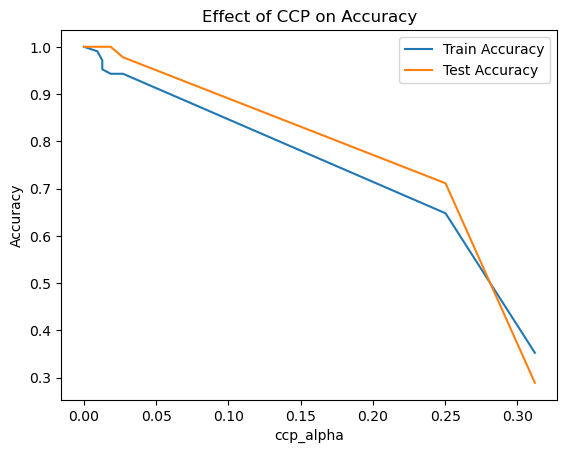

In [12]:
## 12 Apply Cost Complexity Pruning (CCP) and Visualize Accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load iris dataset (classification)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_accuracies = []
test_accuracies = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

plt.plot(ccp_alphas, train_accuracies, label="Train Accuracy")
plt.plot(ccp_alphas, test_accuracies, label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of CCP on Accuracy")
plt.show()


In [13]:
# 13. Evaluate Performance using Precision, Recall, and F1-Score

from sklearn.metrics import precision_score, recall_score, f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
